In [1]:
import torch
import torchvision
from torchvision import transforms
from torch import nn
import torch.utils.data
import sys

import cv2
import scipy
import glob
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os
import pdb
from torch.utils.data import Dataset, DataLoader
from PIL import Image

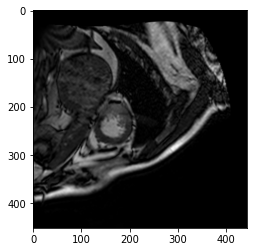

In [3]:
img_fname = 'D:/2021-2022/SDS/postgrad/ZMIC/Orientation-Adjust-Tool-master/MSCMR_orient-master/code/data_transform/C0/3/patient6_C01.png'
img = cv2.imread(img_fname, 0)

# cv2.imshow('img1',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
from collections import Counter
Counter(img.flatten())

Counter({0: 76471,
         1: 7148,
         3: 2737,
         9: 1629,
         12: 1481,
         15: 1435,
         16: 1369,
         18: 1422,
         19: 1433,
         21: 1566,
         20: 1517,
         17: 1555,
         25: 1639,
         30: 1589,
         36: 1379,
         41: 1211,
         45: 1061,
         48: 936,
         49: 911,
         47: 948,
         44: 1061,
         39: 1181,
         33: 1548,
         26: 1723,
         8: 1683,
         5: 2307,
         2: 3696,
         4: 2433,
         6: 2092,
         13: 1461,
         29: 1615,
         52: 766,
         60: 586,
         68: 590,
         77: 422,
         84: 350,
         88: 334,
         86: 350,
         81: 419,
         76: 432,
         70: 489,
         67: 527,
         66: 540,
         64: 575,
         56: 681,
         42: 1137,
         43: 1163,
         61: 613,
         75: 455,
         89: 333,
         103: 321,
         116: 350,
         127: 324,
         135: 290,
  

In [5]:
# 截断扩展到3通道
img100, img80, img60 = img.copy(), img.copy(), img.copy()
rec1, img80 = cv2.threshold(img,0.8*np.max(img),0.8*np.max(img),cv2.THRESH_TRUNC)  # 超过阈值取阈值
rec1, img60 = cv2.threshold(img,0.6*np.max(img),0.6*np.max(img),cv2.THRESH_TRUNC)
# rec1, img80 = cv2.threshold(img,0.8*np.max(img),255,cv2.THRESH_TOZERO_INV)  # 超过阈值取0 
# rec1, img60 = cv2.threshold(img,0.6*np.max(img),255,cv2.THRESH_TOZERO_INV)


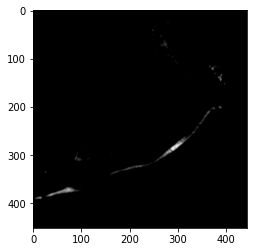

In [6]:
plt.imshow(img100-img60, cmap='gray')
plt.show()

In [7]:

# 直方图均衡化
img100 = cv2.equalizeHist(img100)
img80 = cv2.equalizeHist(img80)
img60 = cv2.equalizeHist(img60) 
# plt.imshow(img100, cmap='gray')
# plt.show()
img = cv2.merge([img100,img80,img60])


In [8]:
img.shape

(452, 444, 3)